# Predicting Commodity Prices using Linear Regression in the Philippines
A **CS 180: Introduction to Artificial Intelligence** project that aims to develop a predictive **linear regression** model to accurately forecast commodity prices for future months and years using the **Philippine Food Prices Dataset**.

By Herminio Gregorio, Ali Jafri, and Ayen Manguan

## Preliminaries

First, import libraries and import our dataset. 

In [2110]:
# @title Import Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [2111]:
# @title Load Dataset
data = pd.read_csv('wfp_food_prices_phl.csv')
data.head()

/var/folders/9l/h3zx8f2s6jn1tpcr1vcv95rc0000gp/T/ipykernel_10701/278703577.py:2: DtypeWarning: Columns (4,5,12,13) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('wfp_food_prices_phl.csv')


,date,admin1,admin2,market,latitude,longitude,category,commodity,unit,priceflag,pricetype,currency,price,usdprice
0,#date,#adm1+name,#adm2+name,#loc+market+name,#geo+lat,#geo+lon,#item+type,#item+name,#item+unit,#item+price+flag,#item+price+type,#currency,#value,#value+usd
1,2000-01-15,National Capital region,Metropolitan Manila,Metro Manila,14.604167,120.982222,cereals and tubers,Maize flour (yellow),KG,actual,Retail,PHP,15.0,0.3717
2,2000-01-15,National Capital region,Metropolitan Manila,Metro Manila,14.604167,120.982222,cereals and tubers,"Rice (milled, superior)",KG,actual,Retail,PHP,20.0,0.4957
3,2000-01-15,National Capital region,Metropolitan Manila,Metro Manila,14.604167,120.982222,cereals and tubers,"Rice (milled, superior)",KG,actual,Wholesale,PHP,18.35,0.4548
4,2000-01-15,National Capital region,Metropolitan Manila,Metro Manila,14.604167,120.982222,cereals and tubers,"Rice (regular, milled)",KG,actual,Wholesale,PHP,16.35,0.4052


Let's perform a bit of processing and take a quick look at our data.

In [2112]:
# @title Drop Missing Values
data = data.dropna()

In [2113]:
# @title Check shape and columns
data.shape
data.columns

Index(['date', 'admin1', 'admin2', 'market', 'latitude', 'longitude',
       'category', 'commodity', 'unit', 'priceflag', 'pricetype', 'currency',
       'price', 'usdprice'],
      dtype='object')

There are 121,513 rows and 14 columns of data in our dataset!

# Preprocessing

First, we ensure that our dataset is ready for analysis!

In [2114]:
# @title Check information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121513 entries, 0 to 121512
Data columns (total 14 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   date       121513 non-null  object
 1   admin1     121513 non-null  object
 2   admin2     121513 non-null  object
 3   market     121513 non-null  object
 4   latitude   121513 non-null  object
 5   longitude  121513 non-null  object
 6   category   121513 non-null  object
 7   commodity  121513 non-null  object
 8   unit       121513 non-null  object
 9   priceflag  121513 non-null  object
 10  pricetype  121513 non-null  object
 11  currency   121513 non-null  object
 12  price      121513 non-null  object
 13  usdprice   121513 non-null  object
dtypes: object(14)
memory usage: 13.0+ MB


In [2115]:
# @title Drop unnecessary columns
# `admin2` = Province; `market` = City; latitude and longitude = not needed;
# `currency` = all PHP; `usdprice` = not included in analysis

data.drop(['admin2', 'market', 'latitude',
           'longitude', 'currency', 'usdprice'], axis=1, inplace=True)

data.head()

,date,admin1,category,commodity,unit,priceflag,pricetype,price
0,#date,#adm1+name,#item+type,#item+name,#item+unit,#item+price+flag,#item+price+type,#value
1,2000-01-15,National Capital region,cereals and tubers,Maize flour (yellow),KG,actual,Retail,15.0
2,2000-01-15,National Capital region,cereals and tubers,"Rice (milled, superior)",KG,actual,Retail,20.0
3,2000-01-15,National Capital region,cereals and tubers,"Rice (milled, superior)",KG,actual,Wholesale,18.35
4,2000-01-15,National Capital region,cereals and tubers,"Rice (regular, milled)",KG,actual,Wholesale,16.35


In [2116]:
# @title Remove first garbage row
data = data[1:]

In [2117]:
# @title Rename region

# Map region to an integer value
le = LabelEncoder()
data['region'] = le.fit_transform(data['admin1'])
data = data.drop(['admin1'], axis=1)

label_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print(label_mapping)

data

{'Autonomous region in Muslim Mindanao': 0, 'Cordillera Administrative region': 1, 'National Capital region': 2, 'Region I': 3, 'Region II': 4, 'Region III': 5, 'Region IV-A': 6, 'Region IV-B': 7, 'Region IX': 8, 'Region V': 9, 'Region VI': 10, 'Region VII': 11, 'Region VIII': 12, 'Region X': 13, 'Region XI': 14, 'Region XII': 15, 'Region XIII': 16}


,date,category,commodity,unit,priceflag,pricetype,price,region
1,2000-01-15,cereals and tubers,Maize flour (yellow),KG,actual,Retail,15.0,2
2,2000-01-15,cereals and tubers,"Rice (milled, superior)",KG,actual,Retail,20.0,2
3,2000-01-15,cereals and tubers,"Rice (milled, superior)",KG,actual,Wholesale,18.35,2
4,2000-01-15,cereals and tubers,"Rice (regular, milled)",KG,actual,Wholesale,16.35,2
5,2000-01-15,cereals and tubers,"Rice (milled, superior)",KG,actual,Retail,19.0,5
...,...,...,...,...,...,...,...,...
121508,2021-02-15,vegetables and fruits,Ginger,KG,aggregate,Retail,114.0,16
121509,2021-02-15,vegetables and fruits,Mangoes (carabao),KG,aggregate,Retail,106.67,16
121510,2021-02-15,vegetables and fruits,Onions (red),KG,aggregate,Retail,114.17,16
121511,2021-02-15,vegetables and fruits,Papaya,KG,aggregate,Retail,45.0,16


Price is listed as objects, which is problematic for processing. 

In [2118]:
# @title Convert datatypes
data['price'] = data['price'].astype(float)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121512 entries, 1 to 121512
Data columns (total 8 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   date       121512 non-null  object 
 1   category   121512 non-null  object 
 2   commodity  121512 non-null  object 
 3   unit       121512 non-null  object 
 4   priceflag  121512 non-null  object 
 5   pricetype  121512 non-null  object 
 6   price      121512 non-null  float64
 7   region     121512 non-null  int64  
dtypes: float64(1), int64(1), object(6)
memory usage: 7.4+ MB


In [2119]:
# @title Process date into own columns (year, month, day)
data['date'] = pd.to_datetime(data['date'])

# Distribute into own columns
data['year'] = data['date'].dt.year
data['month'] = data['date'].dt.month
data['day'] = data['date'].dt.day

# Drop raw date
data.drop('date', axis=1, inplace=True)

data.head()

,category,commodity,unit,priceflag,pricetype,price,region,year,month,day
1,cereals and tubers,Maize flour (yellow),KG,actual,Retail,15.00,2,2000,1,15
2,cereals and tubers,"Rice (milled, superior)",KG,actual,Retail,20.00,2,2000,1,15
3,cereals and tubers,"Rice (milled, superior)",KG,actual,Wholesale,18.35,2,2000,1,15
4,cereals and tubers,"Rice (regular, milled)",KG,actual,Wholesale,16.35,2,2000,1,15
5,cereals and tubers,"Rice (milled, superior)",KG,actual,Retail,19.00,5,2000,1,15


Combine rows with price flags aggregate and actual.

In [2120]:
data.columns

Index(['category', 'commodity', 'unit', 'priceflag', 'pricetype', 'price',
       'region', 'year', 'month', 'day'],
      dtype='object')

In [2121]:
# Group by the specified columns and calculate the mean of 'price' for 'actual' and 'aggregate' rows separately
columns_to_check = ['price','category', 'commodity', 'unit', 'pricetype', 'region', 'year', 'month', 'day']
# Get all unique rows based on the columns in 'columns_to_check'
unique_rows = data[columns_to_check].drop_duplicates()

# Group by the specified columns and calculate the mean of 'price'

# # Drop the 'priceflag' column from the original DataFrame
# data = data.drop(columns='priceflag')

# # Replace the 'price' in the original DataFrame with the mean 'price' from the grouped DataFrame
# data = data.set_index(columns_to_check).update(grouped_data.set_index(columns_to_check))

# # Reset the index of the DataFrame
# data = data.reset_index()

# data

,priceflag,price,category,commodity,unit,pricetype,region,year,month,day
1,actual,15.00,cereals and tubers,Maize flour (yellow),KG,Retail,2,2000,1,15
2,actual,20.00,cereals and tubers,"Rice (milled, superior)",KG,Retail,2,2000,1,15
3,actual,18.35,cereals and tubers,"Rice (milled, superior)",KG,Wholesale,2,2000,1,15
4,actual,16.35,cereals and tubers,"Rice (regular, milled)",KG,Wholesale,2,2000,1,15
5,actual,19.00,cereals and tubers,"Rice (milled, superior)",KG,Retail,5,2000,1,15
...,...,...,...,...,...,...,...,...,...,...
121508,aggregate,114.00,vegetables and fruits,Ginger,KG,Retail,16,2021,2,15
121509,aggregate,106.67,vegetables and fruits,Mangoes (carabao),KG,Retail,16,2021,2,15
121510,aggregate,114.17,vegetables and fruits,Onions (red),KG,Retail,16,2021,2,15
121511,aggregate,45.00,vegetables and fruits,Papaya,KG,Retail,16,2021,2,15


## Data Exploration

Let us explore our data and figure out what is the best approach for our model.

In [2122]:
# @title Check number of commodities and regions
num_unique_commodities = data['commodity'].nunique()
num_unique_regions = data['region'].nunique()
print(f"Commodities: {num_unique_commodities}; Regions: {num_unique_regions}")

Commodities: 73; Regions: 17


In [2123]:
# @title Inspect commodity types
unique_commodities = data['commodity'].unique()
print(unique_commodities)

['Maize flour (yellow)' 'Rice (milled, superior)' 'Rice (regular, milled)'
 'Maize flour (white)' 'Meat (pork)' 'Maize (yellow)' 'Maize (white)'
 'Rice (paddy)' 'Cabbage' 'Carrots' 'Garlic' 'Tomatoes' 'Potatoes (Irish)'
 'Sweet potatoes' 'Fish (fresh)' 'Meat (beef, chops with bones)'
 'Meat (chicken, whole)' 'Onions (red)' 'Onions (white)' 'Eggs'
 'Beans (mung)' 'Groundnuts (unshelled)' 'Rice (premium)' 'Rice (special)'
 'Rice (well milled)' 'Taro' 'Anchovies' 'Crab' 'Fish (frigate tuna)'
 'Fish (mackerel, fresh)' 'Fish (roundscad)' 'Fish (slipmouth)'
 'Fish (threadfin bream)' 'Meat (beef)' 'Meat (pork, with bones)'
 'Shrimp (endeavor)' 'Groundnuts (shelled)' 'Bananas (latundan)'
 'Bananas (saba)' 'Beans (green, fresh)' 'Beans (string)' 'Bitter melon'
 'Bottle gourd' 'Cabbage (chinese)' 'Calamansi' 'Choko' 'Coconut'
 'Eggplants' 'Ginger' 'Papaya' 'Squashes' 'Sweet Potato leaves'
 'Water spinach' 'Semolina (white)' 'Semolina (yellow)' 'Eggs (duck)'
 'Fish (milkfish)' 'Fish (redbelly yel

In [2124]:
tilapia_avg_price = data[data['commodity'] == 'Fish (tilapia)']['price'].mean()
milkfish_avg_price = data[data['commodity'] == 'Fish (milkfish)']['price'].mean()
'Rice (milled, superior)' 
print('Average price of Fish (Tilapia):', tilapia_avg_price)
print('Average price of Fish (Milkfish):', milkfish_avg_price)

Average price of Fish (Tilapia): 149.53441444372154
Average price of Fish (Milkfish): 190.06362053703157


While removing subcategories was considered in order to lessen the data, the price difference was too big and may affect results.

We will check if linear regression is the best model for our data

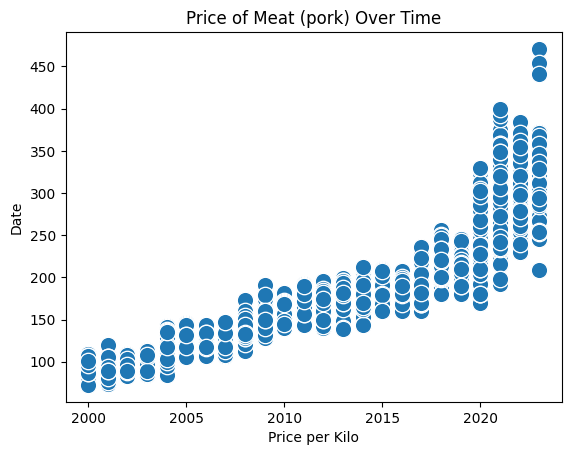

In [2125]:
# @title Pork Data

# Filter rows where commodity is pork
pork = data[(data['commodity'] == 'Meat (pork)')]

sns.scatterplot(x=pork['year'], y = pork['price'], s=140)
plt.xlabel('Price per Kilo')
plt.ylabel('Date')
plt.title('Price of Meat (pork) Over Time')
plt.show()

### Perform regression on the dataset.

In [2126]:
# Sample on 'Rice (regular, milled)' in 'Region III'
pork_sample = data[(data['commodity'] == 'Meat (pork)') & (data['region'] == 'Region III')]
pork_sample

# Split
X = pork_sample.drop(['price'], axis=1).values
y = pork_sample['price'].values
print(y)
print(type(y))

[]
<class 'numpy.ndarray'>


In [2127]:
# Sample on 'Rice (regular, milled)' in 'Region III'
pork_sample = pork_sample.dropna(subset=['price'])
pork_sample.info()
pork_sample = data[(data['commodity'] == 'Meat (pork)') & (data['region'] == 'Region III')]
pork_sample

# Split
X = pork_sample.drop(['price'], axis=1).values
y = pork_sample['price'].values


<class 'pandas.core.frame.DataFrame'>
Index: 0 entries
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   category   0 non-null      object 
 1   commodity  0 non-null      object 
 2   unit       0 non-null      object 
 3   priceflag  0 non-null      object 
 4   pricetype  0 non-null      object 
 5   price      0 non-null      float64
 6   region     0 non-null      int64  
 7   year       0 non-null      int32  
 8   month      0 non-null      int32  
 9   day        0 non-null      int32  
dtypes: float64(1), int32(3), int64(1), object(5)
memory usage: 0.0+ bytes


In [2128]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

# Train
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# Predict
y_pred = regressor.predict(X_test)

y_pred = regressor.predict(X_test)
comparison_df = pd.DataFrame({"Actual":y_test,"Predicted":y_pred})

mse = mean_squared_error(y_test, y_pred)

display(comparison_df)
print('MAE:', mean_absolute_error(y_test,y_pred))
print('MSE:', mse)
print("RMSE:",np.sqrt(mse))
print("r2:", r2_score(y_test,y_pred))


ValueError: With n_samples=0, test_size=0.3 and train_size=None, the resulting train set will be empty. Adjust any of the aforementioned parameters.

### Show results.